In [207]:
import os
import re
import random
import string      # for string operations
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import plotly.express as px
# SetUp NLTK
!pip install --user -U nltk
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/leenasingh/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [208]:
df=pd.read_csv('Corona_NLP_test.csv')
df

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive
2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and love...,Extremely Positive
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral
...,...,...,...,...,...,...
3793,3794,48746,Israel ??,16-03-2020,Meanwhile In A Supermarket in Israel -- People...,Positive
3794,3795,48747,"Farmington, NM",16-03-2020,Did you panic buy a lot of non-perishable item...,Negative
3795,3796,48748,"Haverford, PA",16-03-2020,Asst Prof of Economics @cconces was on @NBCPhi...,Neutral
3796,3797,48749,NaN,16-03-2020,Gov need to do somethings instead of biar je r...,Extremely Negative


In [209]:
import seaborn as sns

In [210]:
pie_data=pd.DataFrame(df.groupby('Sentiment',as_index=False)['UserName'].count())
pie_data

,Sentiment,UserName
0,Extremely Negative,592
1,Extremely Positive,599
2,Negative,1041
3,Neutral,619
4,Positive,947


([<matplotlib.patches.Wedge at 0x290a9a050>,
 [Text(0.970729275642409, 0.5173825213618685, 'Extremely Negative'),
  Text(0.1053850352879392, 1.0949401784286483, 'Extremely Positive'),
  Text(-1.0475035480037334, 0.33576229228367843, 'Negative'),
  Text(-0.5349609387957083, -0.9611538867230444, 'Neutral'),
  Text(0.779424270361453, -0.7762073220290548, 'Positive')],
 [Text(0.5294886958049503, 0.28220864801556456, '16%'),
  Text(0.0574827465206941, 0.5972400973247172, '16%'),
  Text(-0.5713655716384, 0.18314306851837003, '27%'),
  Text(-0.29179687570674995, -0.5242657563943878, '16%'),
  Text(0.42514051110624707, -0.4233858120158481, '25%')])

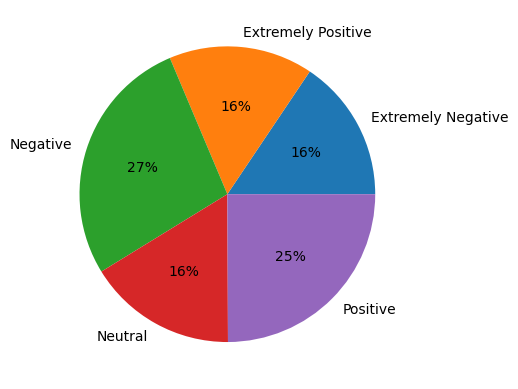

In [211]:
plt.pie(pie_data['UserName'],labels=pie_data['Sentiment'],autopct='%.00f%%')

In [212]:
fig = px.pie(df, names='Sentiment',hole=0.3, title='Sentiment Pie Chart')
fig.show()

In [213]:
#Separating positive and negative datasets
all_positive_tweets= df.loc[df['Sentiment']=='Positive','OriginalTweet'].reset_index(drop=True)
all_negative_tweets= df.loc[df['Sentiment']=='Negative','OriginalTweet'][:947].reset_index(drop=True)

In [214]:
pos_train,pos_test=train_test_split(all_positive_tweets,test_size=0.2)
neg_train,neg_test=train_test_split(all_negative_tweets,test_size=0.2)

In [215]:
from nltk.tokenize import word_tokenize

words=word_tokenize(all_positive_tweets[0])
words

['When',
 'I',
 'could',
 "n't",
 'find',
 'hand',
 'sanitizer',
 'at',
 'Fred',
 'Meyer',
 ',',
 'I',
 'turned',
 'to',
 '#',
 'Amazon',
 '.',
 'But',
 '$',
 '114.97',
 'for',
 'a',
 '2',
 'pack',
 'of',
 'Purell',
 '?',
 '?',
 '!',
 '!',
 'Check',
 'out',
 'how',
 '#',
 'coronavirus',
 'concerns',
 'are',
 'driving',
 'up',
 'prices',
 '.',
 'https',
 ':',
 '//t.co/ygbipBflMY']

In [216]:
from nltk.tokenize import sent_tokenize
sent_tokenize(all_positive_tweets[0])


["When I couldn't find hand sanitizer at Fred Meyer, I turned to #Amazon.",
 'But $114.97 for a 2 pack of Purell??!',
 '!Check out how  #coronavirus concerns are driving up prices.',
 'https://t.co/ygbipBflMY']

In [217]:
import nltk                                # Python library for NLP
from nltk.corpus import twitter_samples    # sample Twitter dataset from NLTK
from nltk.corpus import stopwords          # module for stop words that come with NLTK
from nltk.stem import PorterStemmer        # module for stemming
from nltk.stem import WordNetLemmatizer    # module for Lemmatization

from nltk.tokenize import TweetTokenizer
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/leenasingh/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/leenasingh/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [218]:
TweetTokenizer(preserve_case=False, strip_handles=True,
                        reduce_len=True).tokenize(all_positive_tweets[0])

['when',
 'i',
 "couldn't",
 'find',
 'hand',
 'sanitizer',
 'at',
 'fred',
 'meyer',
 ',',
 'i',
 'turned',
 'to',
 '#amazon',
 '.',
 'but',
 '$',
 '114.97',
 'for',
 'a',
 '2',
 'pack',
 'of',
 'purell',
 '?',
 '?',
 '!',
 '!',
 'check',
 'out',
 'how',
 '#coronavirus',
 'concerns',
 'are',
 'driving',
 'up',
 'prices',
 '.',
 'https://t.co/ygbipBflMY']

In [219]:
nltk.download("stopwords")


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/leenasingh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [220]:
def process_tweet(tweet):
    lemmatizer = WordNetLemmatizer()
    stopwords_english = stopwords.words('english')
    # remove stock market tickers like $GE
    tweet = re.sub(r'\$\w*', '', tweet)
    # remove old style retweet text "RT"
    tweet = re.sub(r'^RT[\s]+', '', tweet)
    # remove hyperlinks
    tweet = re.sub(r'https?://[^\s\n\r]+', '', tweet)
    # remove hashtags
    # only removing the hash # sign from the word
    tweet = re.sub(r'#', '', tweet)
    # tokenize tweets
    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True,
                        reduce_len=True)
    tweet_tokens = tokenizer.tokenize(tweet)

    tweets_clean = []
    for word in tweet_tokens:
        if (word not in stopwords_english and  # remove stopwords
                word not in string.punctuation):  # remove punctuation
            # tweets_clean.append(word)
            lemma_word = lemmatizer.lemmatize(word)  # stemming word
            tweets_clean.append(lemma_word)

    return tweets_clean

In [221]:
def build_frequency(ys,tweets):
    
    ys=np.squeeze(ys).tolist()
    
    freq={}
    
    for ys,tweet in zip(ys,tweets):
        for word in process_tweet(tweet):
            if (word,ys) in freq:
                freq[(word,ys)]+=1
            else:
                freq[(word,ys)]=1
    
    return freq
            
    


In [222]:
training_tweets=list(pd.concat([pos_train,neg_train],axis=0))
labels=np.append(np.ones(len(pos_train),dtype=int),np.zeros(len(neg_train),dtype=int))


    

In [223]:
freqs=build_frequency(labels,training_tweets)
freqs

{('way', 1): 19,
 ('deal', 1): 6,
 ('coronavirus', 1): 274,
 ('grocery', 1): 165,
 ('publix', 1): 1,
 ('target', 1): 4,
 ('use', 1): 18,
 ('shipt', 1): 1,
 ('wanna', 1): 4,
 ('play', 1): 5,
 ('stock', 1): 180,
 ('market', 1): 17,
 ('robinhood', 1): 1,
 ('acorn', 1): 1,
 ('food', 1): 270,
 ('delivery', 1): 22,
 ('uber', 1): 1,
 ('eats', 1): 1,
 ('reducefoodwaste', 1): 1,
 ('foodwaste', 1): 2,
 ('happen', 1): 6,
 ('canned', 1): 17,
 ('item', 1): 19,
 ('people', 1): 137,
 ('hoarded', 1): 3,
 ('\x92', 1): 215,
 ('eat', 1): 15,
 ('expire', 1): 1,
 ('american', 1): 11,
 ('probably', 1): 6,
 ('already', 1): 11,
 ('ton', 1): 1,
 ('pantry', 1): 9,
 ('need', 1): 84,
 ('2', 1): 38,
 ('year', 1): 12,
 ('good', 1): 42,
 ('covid', 1): 571,
 ('19', 1): 228,
 ('store', 1): 242,
 ('shelf', 1): 40,
 ('become', 1): 7,
 ('bare', 1): 4,
 ('bet', 1): 2,
 ('health', 1): 27,
 ('nut', 1): 4,
 ('loving', 1): 1,
 ('processed', 1): 2,
 ('life', 1): 26,
 ('_19', 1): 290,
 ('coronapocalypse', 1): 30,
 ('grocerystor

In [224]:
def extract_features(tweet,freqs):
    
    x=np.zeros((1,3))
    x[0,0]=1

    for word in process_tweet(tweet):
        x[0,1]+= freqs.get((word, 1),0)
        x[0,2]+= freqs.get((word, 0),0)
        
    return x

In [225]:
x= np.zeros((len(training_tweets),3))

for i in range(len(training_tweets)):
    x[i,:]=extract_features(training_tweets[i],freqs)



In [226]:
from sklearn.linear_model import LogisticRegression

model=LogisticRegression()
model.fit(x,labels)
model.score(x,labels)

0.6994715984147952

In [227]:
testing_tweets= list(pd.concat([pos_test,neg_test],axis=0))

y= np.zeros((len(testing_tweets),3))

for i in range(len(testing_tweets)):
    y[i,:]=extract_features(testing_tweets[i],freqs) 
    
y



array([[1.000e+00, 1.067e+03, 1.079e+03],
       [1.000e+00, 8.800e+02, 8.970e+02],
       [1.000e+00, 1.125e+03, 1.171e+03],
       ...,
       [1.000e+00, 9.320e+02, 9.780e+02],
       [1.000e+00, 1.596e+03, 1.819e+03],
       [1.000e+00, 1.194e+03, 1.302e+03]])

In [228]:
pred=model.predict(y)
pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,

In [229]:
labels_test=np.append(np.ones(len(pos_test),dtype=int),np.zeros(len(neg_test),dtype=int))
model.score(y,labels_test)

0.5815789473684211